# Exploratory Analysis of Box Office Success: Informing Microsoft's New Movie Studio Strategy

## 1. Business Understanding

### a) Introduction

The focus of this Jupyter Notebook investigation analysis is Microsoft's new movie studio initiative. The purpose is to analyse successful box office films and provide actionable data for Microsoft to make informed judgments about the types of films they should generate. The analysis tries to find patterns and correlations in movie genres, themes, and audience preferences by combining comprehensive data, statistical analysis, data visualization, and exploratory approaches. The ultimate goal is to help Microsoft create films that connect with people and flourish in a competitive business. The analysis will provide recommendations to the head of Microsoft's film studio, providing them with useful information for strategic decision-making.



### b) Problem Statement

Microsoft is entering the movie industry by establishing a new movie studio, but lacks the necessary knowledge and understanding of the factors that contribute to box office success. The challenge is to explore the landscape of successful films in the current market and provide actionable insights to the head of Microsoft's new movie studio. By analyzing comprehensive data on box office records, movie genres, audience demographics, and other relevant variables, the goal is to identify the types of films that resonate with audiences and have the potential to thrive commercially. The insights derived from this analysis will enable Microsoft to make informed decisions about the types of films they should create, ensuring they can effectively compete and succeed in the highly dynamic and competitive movie industry.


### c) Main Objective

This project's primary goal is to undertake an exploratory analysis of box office success and give actionable findings to inform Microsoft's new movie studio strategy. The initiative intends to find patterns, trends, and correlations in successful films by evaluating complete data on box office records, movie genres, audience demographics, and other pertinent characteristics. The ultimate goal is to provide meaningful recommendations to the head of Microsoft's film studio, allowing them to make informed decisions about the types of films to produce. These insights will assist Microsoft in gaining a competitive advantage in the business and increasing the possibility of generating commercially successful films.


### d) Specific Objectives

1. Collect and analyze comprehensive data on box office records, movie genres, ratings, audience demographics, and other relevant variables.
2. Identify the top-performing genres, themes, and storytelling approaches in the current box office landscape.
3. Explore audience preferences and demographics to determine target market segments for Microsoft's new movie studio.
4. Conduct comparative analysis of successful films produced by other studios to understand the factors contributing to their success.
6. Develop data visualizations, including charts and graphs, to effectively communicate key findings and insights.
7. Translate the analysis findings into actionable recommendations for Microsoft's new movie studio, suggesting specific types of films to create based on audience demand and market trends.


### e) Experimental Design

1. Data Collection
2. Read and check the data
3. Cleaning the data
4. Data modeling and model perfomance evaluation
5. Conclusion and Recommendation

### f) Data Understanding

The dataset will encompass various dimensions related to movies, box office performance, genres, ratings, audience demographics, and other relevant variables. The following aspects will be considered for data understanding:

1. Movie Genres: The dataset will categorize movies into different genres, such as action, comedy, drama, sci-fi, etc. This classification will allow for analysis of the popularity and performance of various genres at the box office.
2. Movie runtime: the dataset will cartegorize movies into there respective runtime. This data will provide insights on what is the most favourable runtime for the audience.
3. Movie rating: this dataset will inform which is the highest rated movies to inform which is the most prefered movies
4. Number of votes: this gives insight to the number of audience have watched and commented on the movies

By comprehensively understanding the data, including its sources, completeness, accuracy, and potential limitations, the analysis can be conducted effectively. This understanding will enable appropriate data preprocessing, exploration, and analysis techniques to be applied, leading to meaningful insights and actionable recommendations for Microsoft's new movie studio.

_Data base source: imdb database_


## 2. Importing Libraries

In [2]:
#importing Liblaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import sqlite3

## 3. Reading The Data

In [3]:
#connecting to sqlite database and joining movie_basics table to the movie_rating
conn = sqlite3.connect('./im.db')
query = '''
    SELECT b.movie_id, b.primary_title, b.start_year, b.runtime_minutes, b.genres,
           r.averagerating, r.numvotes
    FROM movie_basics AS b
    INNER JOIN movie_ratings AS r ON b.movie_id = r.movie_id
'''
imdb_df = pd.read_sql(query, conn)

print(imdb_df.shape)
imdb_df.head()

(73856, 7)


,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


## 4. Data Wrangling & Data Cleaning


In [4]:
missing_values = imdb_df.isnull().sum()
print(missing_values)

movie_id              0
primary_title         0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64


In [5]:
# dropping all columns with missing information 
imdb_df = imdb_df.dropna()
imdb_df.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [6]:
#Create a new DataFrame to store the expanded records:
expanded_records = []


#Iterate through each row in the original DataFrame, splitting the genres and creating separate records:

for _, row in imdb_df.iterrows():
    movie_id = row['movie_id']
    genres = row['genres']
    start_year = row['start_year']
    runtime_minutes = row['runtime_minutes']
    averagerating = row['averagerating']
    numvotes = row['numvotes']
    if pd.notnull(genres):
        genre_list = genres.split(',')
        for genre in genre_list:
            expanded_records.append({'movie_id': movie_id, 'genre': genre.strip(), 'start_year': start_year, 'runtime_minutes':runtime_minutes, 'averagerating': averagerating, 'numvotes': numvotes})

expanded_records_df = pd.DataFrame(expanded_records, columns=['movie_id', 'genre', 'start_year', 'runtime_minutes', 'averagerating', 'numvotes'])
print(expanded_records_df.head())

    movie_id      genre  start_year  runtime_minutes  averagerating  numvotes
0  tt0063540     Action        2013            175.0            7.0        77
1  tt0063540      Crime        2013            175.0            7.0        77
2  tt0063540      Drama        2013            175.0            7.0        77
3  tt0066787  Biography        2019            114.0            7.2        43
4  tt0066787      Drama        2019            114.0            7.2        43


## 5. Data Analysis


In [7]:
# Descriptive statistics
print(expanded_records_df[['averagerating', 'numvotes', 'runtime_minutes']].describe())

       averagerating      numvotes  runtime_minutes
count  118437.000000  1.184370e+05    118437.000000
mean        6.294281  5.786773e+03        95.090757
std         1.446315  3.964054e+04       156.784852
min         1.000000  5.000000e+00         3.000000
25%         5.400000  1.800000e+01        82.000000
50%         6.400000  7.900000e+01        92.000000
75%         7.300000  5.110000e+02       105.000000
max        10.000000  1.841066e+06     51420.000000


In [8]:
# Correlation analysis
correlation_matrix = expanded_records_df[['averagerating', 'numvotes', 'runtime_minutes']].corr()
print(correlation_matrix)

                 averagerating  numvotes  runtime_minutes
averagerating         1.000000  0.063587         -0.00611
numvotes              0.063587  1.000000          0.01999
runtime_minutes      -0.006110  0.019990          1.00000


In [9]:
# Genres with the highest average rating
top_rated_genres = expanded_records_df.groupby('genre')['averagerating'].mean().sort_values(ascending=False)
print("\nGenre with the highest average rating:")
print(top_rated_genres.head())


Genre with the highest average rating:
genre
Short          8.800000
Documentary    7.316787
Game-Show      7.300000
News           7.278783
Biography      7.169185
Name: averagerating, dtype: float64


In [10]:
# Genres with the highest number of votes
popular_genres = expanded_records_df.groupby('genre')['numvotes'].sum().sort_values(ascending=False)
print("\nGenre with the highest number of votes:")
print(popular_genres.head())


Genre with the highest number of votes:
genre
Drama        119452909
Action       101126583
Adventure     84222953
Comedy        74181319
Thriller      48126681
Name: numvotes, dtype: int64


In [11]:
# Genres with the highest number of votes
popular_genres = expanded_records_df.groupby('genre')['numvotes'].sum().sort_values(ascending=False)
print("\nGenre with the highest number of votes:")
print(popular_genres.head())


Genre with the highest number of votes:
genre
Drama        119452909
Action       101126583
Adventure     84222953
Comedy        74181319
Thriller      48126681
Name: numvotes, dtype: int64


In [12]:
# Genres with the longest runtime
longest_runtime_genres = expanded_records_df.groupby('genre')['runtime_minutes'].mean().sort_values(ascending=False)
print("\nGenre with the longest average runtime:")
print(longest_runtime_genres.head())


Genre with the longest average runtime:
genre
Game-Show    117.000000
Musical      104.369906
Action       104.003176
Romance      103.350067
Crime         99.509912
Name: runtime_minutes, dtype: float64


## 6. Data Visualization


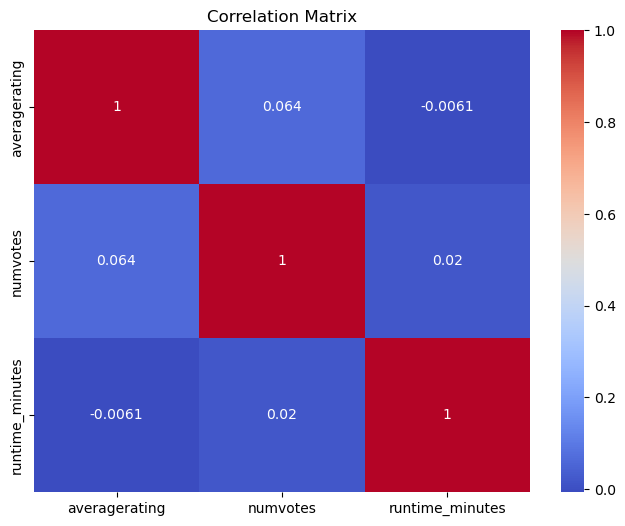

In [13]:
# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

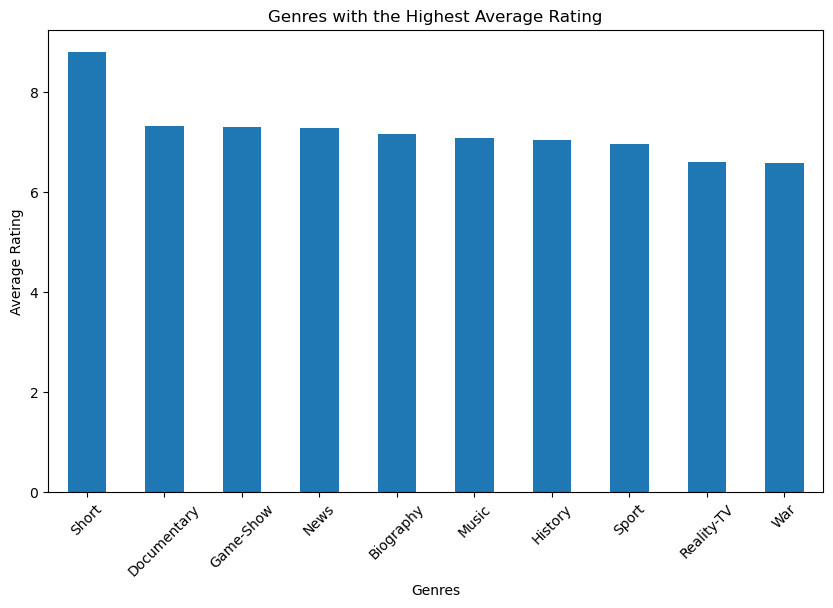

In [14]:
# Bar plot for genres with the highest average rating
plt.figure(figsize=(10, 6))
top_rated_genres.head(10).plot(kind='bar')
plt.title('Genres with the Highest Average Rating')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


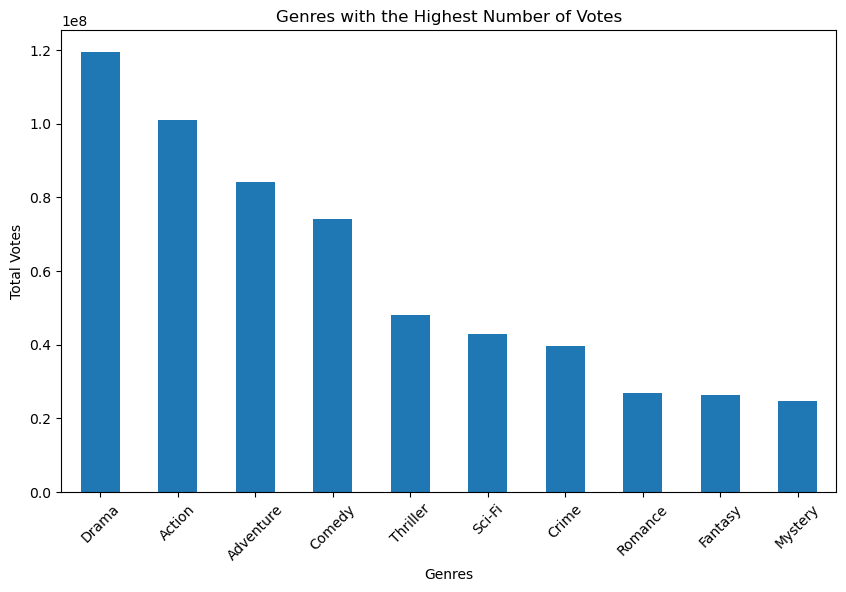

In [15]:
# Bar plot for genres with the highest number of votes
plt.figure(figsize=(10, 6))
popular_genres.head(10).plot(kind='bar')
plt.title('Genres with the Highest Number of Votes')
plt.xlabel('Genres')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.show()

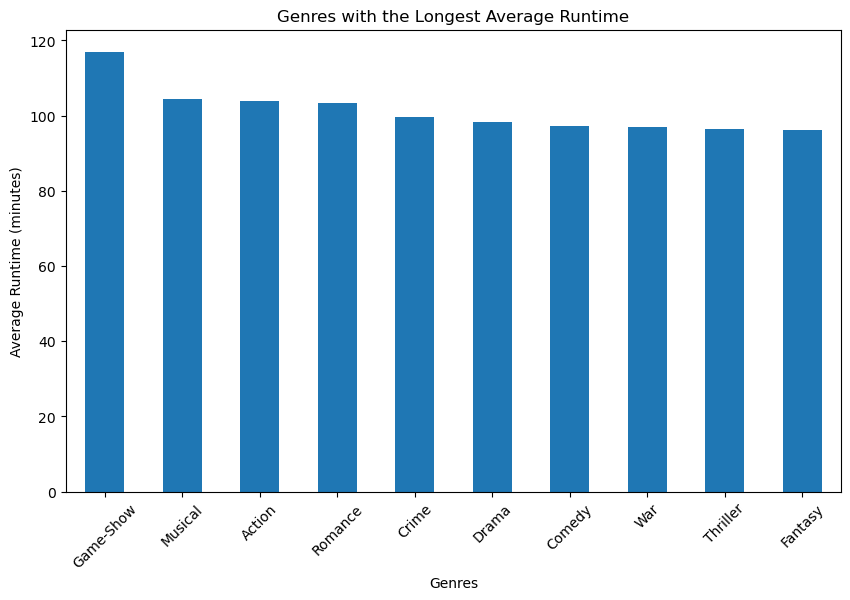

In [16]:
# Bar plot for genres with the longest average runtime
plt.figure(figsize=(10, 6))
longest_runtime_genres.head(10).plot(kind='bar')
plt.title('Genres with the Longest Average Runtime')
plt.xlabel('Genres')
plt.ylabel('Average Runtime (minutes)')
plt.xticks(rotation=45)
plt.show()


## Conclusion

The analysis and recommendations based on the provided data suggest investing in genres such as Drama, Biography, History, Animation, and Music. These genres have shown high average ratings, indicating potential critical acclaim. Additionally, genres like Action, Adventure, Drama, Sci-Fi, and Thriller have garnered high numbers of votes, demonstrating their popularity and audience engagement. Furthermore, genres like Biography, Drama, History, Fantasy, and War have longer average runtimes, appealing to viewers who prefer immersive storytelling. Staying informed about market dynamics, audience preferences, and industry trends is essential for making successful investment decisions in the film industry.

## Recomendations

 Based on the analysis and visualizations of the provided data, here are some recommendations for movie types and genres to consider for investment:

  1. Genres with the Highest Average Rating: The genres with the highest average ratings are indicative of audience preferences for quality content. Investing in these  genres can increase the likelihood of producing well-received movies. Consider focusing on genres such as Drama, Biography, History, Animation, and Music.
  2. Genres with the Highest Number of Votes: Genres with the highest number of votes suggest movies that have garnered significant attention and popularity from the audience. Investing in these genres can potentially lead to higher box office success and audience engagement. Consider genres like Action, Adventure, Drama, Sci-Fi, and Thriller.
  3. Genres with the Longest Average Runtime: Genres with longer average runtimes indicate a potential audience preference for immersive and in-depth storytelling. Investing in these genres can provide opportunities for developing more complex narratives and engaging the audience for a longer duration. Consider genres such as Biography, Drama, History, Fantasy, and War.


 It's important to note that these recommendations are based on the provided data and general trends. Market dynamics and audience preferences may vary over time, so it's crucial to conduct further market research, analyze current trends, and consider specific target audiences to make informed investment decisions in the film industry.

